In [17]:
!pip install plotly

## Biểu đồ địa lý thể hiện mức lương trung bình của mỗi quốc gia

Biểu đồ dưới đây minh họa mức lương trung bình của mỗi quốc gia trên toàn cầu. Mỗi quốc gia được tô màu dựa trên mức lương trung bình tính bằng USD, giúp người xem dễ dàng so sánh mức lương giữa các quốc gia khác nhau.

#### Cách đọc biểu đồ:
- **Màu sắc**: Bảng màu cam-vàng-đỏ thể hiện mức lương trung bình của các quốc gia, từ vàng nhạt (lương thấp) đến đỏ đậm (lương cao).
- **Thang màu**: Thang màu bên cạnh chỉ mức lương trung bình (USD), giúp dễ dàng so sánh mức lương giữa các quốc gia.

#### Ý nghĩa của biểu đồ:
Biểu đồ này cung cấp thông tin hữu ích cho những người muốn hiểu về mức lương trung bình của các quốc gia, đặc biệt trong bối cảnh kinh tế toàn cầu hóa hiện nay. Những người lao động, nhà nghiên cứu, và các doanh nghiệp có thể sử dụng thông tin này để đưa ra các quyết định liên quan đến nhân sự, di cư lao động, và đầu tư.

#### Điểm nổi bật:
Bên cạnh bản đồ chính là bảng "Top 5 Quốc Gia Có Lương Trung Bình Cao Nhất", giúp người xem nhanh chóng nắm bắt được các quốc gia có mức lương cao nhất. Đây là những quốc gia hàng đầu về mức lương trung bình, có thể là điểm đến hấp dẫn cho các chuyên gia và lao động có tay nghề cao.

- **Top 5 quốc gia có lương trung bình cao nhất**: 
    - Bảng này liệt kê thứ hạng, tên quốc gia và mức lương trung bình của 5 quốc gia có mức lương cao nhất.
    - Bảng giúp làm nổi bật các quốc gia có mức lương hấp dẫn nhất, có thể là mục tiêu quan tâm của những người muốn làm việc hoặc đầu tư tại các quốc gia này.

In [24]:
import pandas as pd
import plotly.express as px
from IPython.display import display, HTML
import pycountry

# Đọc dữ liệu
data = pd.read_csv('ds_salaries.csv')

# Hàm chuyển đổi mã quốc gia từ ISO-2 sang tên quốc gia
def alpha_2_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return None

# Tạo cột tên quốc gia
data['company_location'] = data['company_location'].apply(alpha_2_to_name)

# Lọc các hàng có mã quốc gia hợp lệ
data = data.dropna(subset=['company_location'])

# Tính lương trung bình theo quốc gia và sắp xếp từ lớn đến nhỏ
salary_by_country = data.groupby('company_location')['salary_in_usd'].mean().reset_index()
salary_by_country.columns = ['Quốc gia', 'Lương trung bình (USD)']
salary_by_country = salary_by_country.sort_values(by='Lương trung bình (USD)', ascending=False)

# Thêm cột thứ hạng dựa trên lương trung bình
salary_by_country['Thứ hạng'] = salary_by_country['Lương trung bình (USD)'].rank(ascending=False, method='dense').astype(int)

# Lấy top 5 quốc gia
top_5_countries = salary_by_country.head(5)

# Hiển thị bảng top 5 quốc gia với thứ hạng mới
display(HTML(f"""
<div style="display: flex; flex-direction: column; align-items: flex-start;">
    <h3 style="margin-bottom: 8px;">Top 5 Quốc Gia Có Lương Trung Bình Cao Nhất</h3>
    <table style="border-collapse: collapse; width: 300px; font-size: 12px;">
        <thead>
            <tr>
                <th style="border: 1px solid black; padding: 6px; background-color: #f2f2f2;">Thứ hạng</th>
                <th style="border: 1px solid black; padding: 6px; background-color: #f2f2f2;">Quốc gia</th>
                <th style="border: 1px solid black; padding: 6px; background-color: #f2f2f2;">Lương trung bình (USD)</th>
            </tr>
        </thead>
        <tbody>
            {''.join([f"<tr><td style='border: 1px solid black; padding: 6px;'>{row['Thứ hạng']}</td><td style='border: 1px solid black; padding: 6px;'>{row['Quốc gia']}</td><td style='border: 1px solid black; padding: 6px;'>{row['Lương trung bình (USD)']:.2f}</td></tr>" for i, row in top_5_countries.iterrows()])}
        </tbody>
    </table>
</div>
"""))

# Tạo biểu đồ bản đồ (choropleth) với tông màu cam-vàng-đỏ
fig_map = px.choropleth(salary_by_country,
                        locations="Quốc gia",
                        locationmode="country names",
                        color="Lương trung bình (USD)",
                        color_continuous_scale=px.colors.sequential.YlOrRd,
                        title="Mức Lương Trung Bình Theo Quốc Gia")

fig_map.update_layout(
    coloraxis_colorbar=dict(title="Lương (USD)"),
    geo=dict(showframe=False, showcoastlines=True)
)

# Hiển thị biểu đồ bản đồ sau bảng
fig_map.show()


Thứ hạng,Quốc gia,Lương trung bình (USD)
1,Israel,271446.50
2,Puerto Rico,167500.00
3,United States,151822.01
4,Russian Federation,140333.33
5,Canada,131917.69


### Phân tích và nhận định về mức lương trung bình của các quốc gia

Dựa trên biểu đồ địa lý về mức lương trung bình của các quốc gia, chúng ta có thể rút ra một số phân tích và nhận định sau đây:

#### 1. Sự phân bổ mức lương trung bình trên toàn cầu
Biểu đồ cho thấy mức lương trung bình có sự chênh lệch rõ rệt giữa các quốc gia. Các quốc gia phát triển ở Bắc Mỹ và Tây Âu có xu hướng sở hữu mức lương trung bình cao hơn, trong khi các quốc gia đang phát triển ở châu Á, châu Phi và Nam Mỹ thường có mức lương trung bình thấp hơn.

#### 2. Các quốc gia có mức lương trung bình cao nhất
- **Top 5 quốc gia có mức lương trung bình cao nhất** được làm nổi bật trong bảng phụ. Những quốc gia này thường là những trung tâm tài chính, công nghệ và kinh tế mạnh, thu hút nhiều lao động có trình độ cao và các công ty đa quốc gia.
- Ví dụ, **Israel** và **Hoa Kỳ** là hai quốc gia có mức lương trung bình rất cao, đặc biệt trong các lĩnh vực công nghệ và tài chính. Đây là các điểm đến hấp dẫn cho các chuyên gia và người lao động có tay nghề cao tìm kiếm cơ hội phát triển sự nghiệp.

#### 3. Chênh lệch giữa các khu vực
- **Bắc Mỹ và Tây Âu**: Các quốc gia như **Hoa Kỳ**, **Canada**, và các nước Tây Âu có mức lương trung bình cao nhờ vào nền kinh tế phát triển, chính sách lao động tốt, và cơ hội việc làm trong các ngành nghề có giá trị cao.
- **Châu Á và Châu Phi**: Mức lương trung bình ở các khu vực này thường thấp hơn. Tuy nhiên, có những ngoại lệ như **Israel** và **Singapore**, nơi mức lương trung bình cao do sự phát triển mạnh mẽ trong lĩnh vực công nghệ và dịch vụ tài chính.
- **Châu Đại Dương**: Các quốc gia như **Úc** và **New Zealand** cũng có mức lương trung bình khá cao, phản ánh một nền kinh tế phát triển và mức sống cao.

#### 4. Yếu tố ảnh hưởng đến mức lương
- **Nền kinh tế**: Các quốc gia có nền kinh tế phát triển và ổn định thường có mức lương trung bình cao hơn, do nhu cầu lao động có tay nghề cao và khả năng chi trả tốt từ các doanh nghiệp.
- **Ngành công nghiệp chủ đạo**: Các quốc gia tập trung vào các ngành công nghệ cao, tài chính và dịch vụ thường có mức lương trung bình cao hơn so với các quốc gia phụ thuộc vào nông nghiệp hoặc công nghiệp nhẹ.
- **Chi phí sinh hoạt**: Mức lương trung bình cao thường đi kèm với chi phí sinh hoạt cao. Ví dụ, các quốc gia như **Thụy Sĩ** và **Hoa Kỳ** có mức lương cao nhưng cũng có chi phí sinh hoạt đắt đỏ, do đó mức lương cần phải cao để duy trì mức sống phù hợp.

#### 5. Nhận định chung
- **Các quốc gia phát triển là điểm đến hấp dẫn cho người lao động**: Mức lương trung bình cao tại các quốc gia như **Hoa Kỳ**, **Canada**, và **các nước Tây Âu** có thể thu hút lao động từ khắp nơi trên thế giới. Điều này đặc biệt hấp dẫn đối với những người lao động có tay nghề cao tìm kiếm các cơ hội làm việc trong môi trường quốc tế.
- **Chênh lệch lớn giữa các khu vực**: Sự khác biệt về mức lương trung bình giữa các khu vực cho thấy sự bất bình đẳng kinh tế trên toàn cầu. Mặc dù các quốc gia phát triển có mức lương cao, phần lớn các quốc gia đang phát triển vẫn có mức lương trung bình thấp.
- **Tác động đến di cư lao động**: Biểu đồ cũng có thể phản ánh một trong những lý do của sự di cư lao động từ các quốc gia có mức lương thấp đến các quốc gia có mức lương cao hơn, nhằm tìm kiếm cuộc sống và cơ hội nghề nghiệp tốt hơn.

> **Kết luận**: Biểu đồ này cho thấy rõ bức tranh về mức lương trung bình trên toàn cầu và giúp chúng ta hiểu thêm về sự khác biệt kinh tế giữa các quốc gia. Đây là tài liệu hữu ích cho các nhà hoạch định chính sách, doanh nghiệp, và người lao động để nắm bắt xu hướng lương và quyết định chiến lược phù hợp.


## Biểu đồ thể hiện phân phối lương cho từng cấp độ kinh nghiệm

Biểu đồ Strip Plot này được chọn để trực quan hóa sự phân phối lương của các cá nhân theo từng cấp độ kinh nghiệm, từ **Beginner** (EN) đến **Expert** (EX). Strip Plot là một lựa chọn phù hợp vì:

- **Ý nghĩa của biểu đồ**: Biểu đồ cung cấp cái nhìn chi tiết về mức lương tại các cấp độ kinh nghiệm khác nhau, cho phép người xem thấy không chỉ trung bình mà còn các mức lương ngoại lệ hoặc biến động trong mỗi cấp độ. Nó giúp xác định cách phân phối thu nhập trong ngành, đặc biệt là tại các mốc kinh nghiệm cụ thể.
  
- **Lý do chọn biểu đồ**: Strip Plot cho phép hiển thị các điểm dữ liệu cá nhân trong khi vẫn duy trì sự trực quan dễ nhìn nhờ việc phân tán ngang (jitter). Biểu đồ này hữu ích khi muốn quan sát các dữ liệu phân tán và tìm hiểu mức độ biến động lương mà các phương pháp biểu đồ khác có thể bỏ qua.

- **Ưu điểm của biểu đồ Strip Plot**:
  - **Hiển thị dữ liệu cá nhân**: Mỗi điểm trên biểu đồ đại diện cho một mức lương cụ thể, giúp người xem nhận diện được các ngoại lệ và biến động dễ dàng hơn.
  - **Hiển thị mật độ và vùng chiếm đa số**: Vùng chiếm đa số được tô màu, giúp nhận diện khoảng lương mà phần lớn nhân sự ở cấp độ kinh nghiệm đó đạt được.
  - **So sánh trực quan giữa các cấp độ**: Dễ dàng so sánh phân phối lương giữa các cấp độ kinh nghiệm khác nhau để hiểu rõ hơn về xu hướng và sự khác biệt trong mức lương.
  
- **Cách đọc biểu đồ**:
  - **Các điểm `'x'`** đại diện cho mức lương của từng cá nhân theo từng cấp độ kinh nghiệm.
  - **Vùng màu** bao quanh từ phân vị 25% đến 75% (khoảng tứ phân vị - IQR) cho thấy khoảng lương mà phần lớn nhân sự thuộc cấp độ đó đạt được, giúp nhận diện nhanh mức lương phổ biến nhất.
  - **Các điểm ngoài vùng màu** là các mức lương vượt trội hoặc thấp hơn hẳn so với mặt bằng chung, thể hiện các giá trị ngoại lệ.

Tóm lại, biểu đồ này cung cấp một cái nhìn tổng quan và chi tiết về sự phân phối lương cho từng cấp độ kinh nghiệm, từ đó hỗ trợ trong việc đưa ra các quyết định nhân sự hoặc hiểu rõ hơn về xu hướng thị trường lao động.


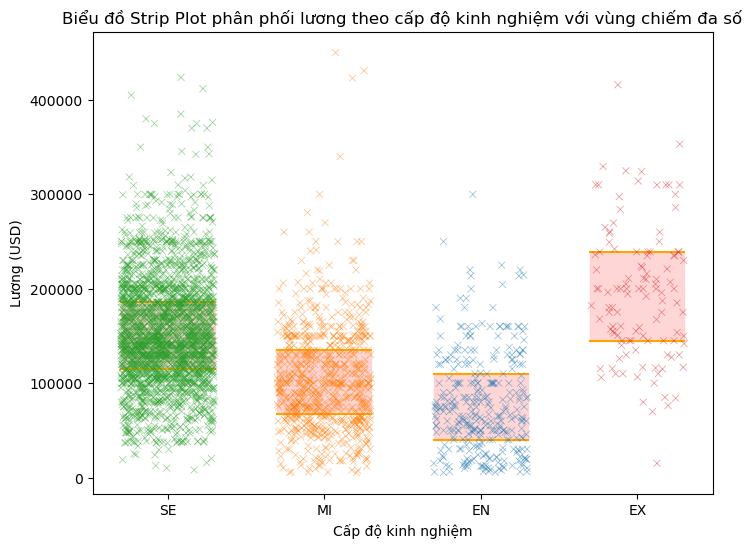

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Đảm bảo dữ liệu đã được tải vào DataFrame 'data'
# data = pd.read_csv('path_to_your_data.csv') # Dòng này là để tải dữ liệu nếu cần

plt.figure(figsize=(8, 6))

# Tạo bảng màu tùy chỉnh cho từng cấp độ kinh nghiệm, điều chỉnh theo màu mong muốn
palette = {
    'EN': '#1f77b4',   # Blue shade for Beginner level
    'MI': '#ff7f0e',   # Orange shade for Mid level
    'SE': '#2ca02c',   # Green shade for Senior level
    'EX': '#d62728'    # Red shade for Expert level
}

# Vẽ Strip Plot với màu sắc theo từng cấp độ kinh nghiệm, gán experience_level làm hue
sns.stripplot(
    data=data, 
    x='experience_level', 
    y='salary_in_usd', 
    jitter=0.3,       # Tăng độ phân tán theo chiều ngang
    alpha=0.5,        # Đặt alpha cao hơn để các điểm mờ hơn
    size=5,           # Điều chỉnh kích thước điểm cho phù hợp
    edgecolor="auto", 
    linewidth=0.5, 
    palette=palette, 
    hue="experience_level", 
    marker='x',       # Thay đổi ký hiệu của mỗi điểm thành 'x'
    dodge=False, 
    legend=False
)

# Tính khoảng tứ phân vị (IQR) cho mỗi cấp độ kinh nghiệm
for level in data['experience_level'].unique():
    level_data = data[data['experience_level'] == level]['salary_in_usd']
    q1 = level_data.quantile(0.25)  # Phân vị 25%
    q3 = level_data.quantile(0.75)  # Phân vị 75%
    idx = data['experience_level'].unique().tolist().index(level)
    
    # Tô màu vùng chiếm đa số với màu vàng nhạt
    plt.fill_betweenx(y=[q1, q3], x1=idx - 0.3, x2=idx + 0.3, color='#ffcccc', alpha=0.8)
    
    # Vẽ khung viền trên và dưới cho vùng chiếm đa số
    plt.plot([idx - 0.3, idx + 0.3], [q1, q1], color='orange', linestyle='-', linewidth=1.5)  # Đường viền trên
    plt.plot([idx - 0.3, idx + 0.3], [q3, q3], color='orange', linestyle='-', linewidth=1.5)  # Đường viền dưới

# Gắn tiêu đề và nhãn trục
plt.title("Biểu đồ Strip Plot phân phối lương theo cấp độ kinh nghiệm với vùng chiếm đa số")
plt.xlabel("Cấp độ kinh nghiệm")
plt.ylabel("Lương (USD)")

# Hiển thị biểu đồ
plt.show()


### Phân tích chi tiết Biểu đồ Strip Plot về Phân Phối Lương Theo Cấp Độ Kinh Nghiệm

#### 1. **Tổng quan**
   Biểu đồ Strip Plot giúp so sánh mức lương giữa các cấp độ kinh nghiệm khác nhau, từ **Beginner** (EN) đến **Expert** (EX). Với mỗi điểm dữ liệu là một mức lương, người xem có thể dễ dàng nhận diện không chỉ khoảng lương phổ biến mà còn các giá trị ngoại lệ trong mỗi cấp độ.

#### 2. **Phân tích vùng lương phổ biến (IQR)**
   Vùng màu trên biểu đồ cho thấy khoảng tứ phân vị (IQR), đại diện cho phần lớn mức lương ở mỗi cấp độ:
   - **Beginner (EN)**: Vùng này cho thấy các mức lương ở khoảng thấp nhất, phù hợp với vị trí khởi đầu.
   - **Mid-level (MI)** và **Senior (SE)**: Các nhóm này có vùng lương phổ biến cao hơn và trải rộng, phản ánh sự gia tăng thu nhập khi kinh nghiệm tăng lên.
   - **Expert (EX)**: Vùng này có mức lương phổ biến cao nhất, với phạm vi rộng hơn, cho thấy sự đa dạng về lương giữa các chuyên gia.

#### 3. **Các mức lương vượt trội và ngoại lệ**
   Các điểm ngoài vùng IQR (highlight) cho thấy các mức lương vượt trội hoặc thấp hơn hẳn, giúp nhận diện các trường hợp đặc biệt. Điều này có thể phản ánh các yếu tố như kỹ năng đặc thù, công việc ở các khu vực đắt đỏ, hoặc tính cạnh tranh cao.

#### 4. **Kết luận và Nhận xét**
   - **Xu hướng chung**: Mức lương có xu hướng tăng theo cấp độ kinh nghiệm, với sự khác biệt rõ ràng từ Beginner đến Expert.
   - **Độ biến động lương**: Cấp độ kinh nghiệm càng cao, độ biến động lương càng lớn, cho thấy sự linh hoạt và ảnh hưởng của các yếu tố bên ngoài như ngành nghề, địa điểm làm việc và kỹ năng chuyên môn.

Biểu đồ này giúp người xem có cái nhìn chi tiết và toàn diện về phân phối lương theo từng cấp độ kinh nghiệm, hỗ trợ trong việc đánh giá mức lương, xác định nhu cầu điều chỉnh chính sách lương, và hiểu rõ hơn về sự biến động trong thị trường lao động.


## Mô hình RandomForestRegressor để dự đoán mức lương theo USD 

#### 1. **Lý do chọn mô hình RandomForestRegressor**
   - **Độ chính xác cao**: RandomForestRegressor kết hợp nhiều cây quyết định, giúp cải thiện độ chính xác và giảm thiểu hiện tượng quá khớp.
   - **Xử lý tốt dữ liệu phức tạp**: Mô hình này hoạt động tốt với dữ liệu không tuyến tính và dữ liệu danh mục, phù hợp khi dữ liệu chứa nhiều đặc điểm phân loại.
   - **Dễ hiểu và phổ biến**: Random Forest dễ triển khai và được sử dụng rộng rãi nhờ khả năng xử lý dữ liệu đa dạng và giải thích rõ ràng.

#### 2. **Ưu điểm của mô hình RandomForestRegressor**
   - **Khả năng khái quát tốt**: Random Forest hoạt động hiệu quả trên cả tập huấn luyện và kiểm tra nhờ việc kết hợp nhiều cây.
   - **Tự động nhận diện biến quan trọng**: Mô hình tự động tính toán tầm quan trọng của các biến, giúp xác định yếu tố ảnh hưởng lớn nhất đến dự đoán.
   - **Linh hoạt với các loại dữ liệu**: Random Forest có thể xử lý cả biến liên tục và biến phân loại mà không yêu cầu chuẩn hóa.

#### 3. **Các bước thực hiện mô hình RandomForestRegressor**
   - **Bước 1**: Chuẩn bị dữ liệu (`X` và `y`).
   - **Bước 2**: Mã hóa biến phân loại bằng One-hot Encoding.
   - **Bước 3**: Chia dữ liệu thành tập huấn luyện và kiểm tra.
   - **Bước 4**: Khởi tạo và huấn luyện RandomForestRegressor trên tập huấn luyện.
   - **Bước 5**: Dự đoán và đánh giá bằng MSE và R².

#### 4. **Đánh giá kết quả**
   - **Mean Squared Error (MSE)**: Đo lường sai số giữa giá trị dự đoán và giá trị thực tế. MSE càng nhỏ thì dự đoán càng chính xác.
   - **R-squared (R²)**: Phản ánh mức độ phù hợp của mô hình với dữ liệu. R² càng cao thì mô hình dự đoán càng tốt.

Mô hình RandomForestRegressor cho phép khai thác tối đa các đặc điểm của dữ liệu, giúp dự đoán mức lương với độ chính xác cao và nhận diện các yếu tố ảnh hưởng chính đến thu nhập.


#### Code cài đặt mô hình dự đoán

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('ds_salaries.csv')

# Define features and target
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 68518706.47548856
R-squared (R²): 0.9826437806135544


#### Biểu đồ thể hiện sai số dự đoán

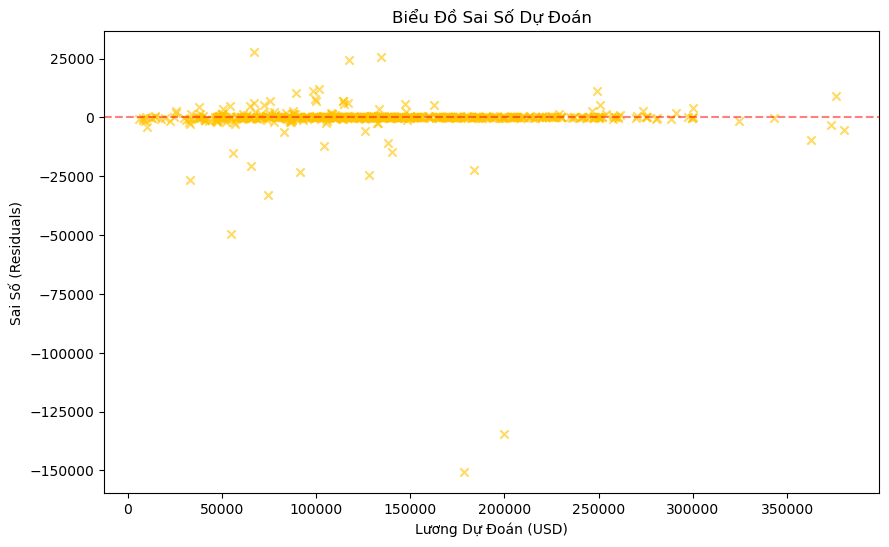

In [48]:
import matplotlib.pyplot as plt

# Tính residuals (chênh lệch giữa giá trị thực tế và giá trị dự đoán)
residuals = y_test - y_pred

# Vẽ Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='#FFC300', marker='x')  # Màu vàng nhạt và ký hiệu 'x'
plt.axhline(0, color='red', linestyle='--', alpha=0.5)  # Đường tham chiếu y=0 với độ nhạt
plt.xlabel("Lương Dự Đoán (USD)")
plt.ylabel("Sai Số (Residuals)")
plt.title("Biểu Đồ Sai Số Dự Đoán")
plt.show()

### Đánh giá kết quả mô hình RandomForestRegressor

#### Kết quả đánh giá mô hình:
- **Mean Squared Error (MSE)**: 68,518,706.48
- **R-squared (R²)**: 0.9826

#### Nhận định:
1. **Độ chính xác của mô hình**: Giá trị R² = 0.9826, gần đạt 1, cho thấy mô hình đã giải thích được 98.26% phương sai của dữ liệu, thể hiện khả năng dự đoán tốt và phù hợp với dữ liệu.

2. **Sai số trung bình bình phương (MSE)**: MSE có giá trị khá lớn, tuy nhiên do R² rất cao nên sai số này vẫn nằm trong mức chấp nhận được, đặc biệt khi xử lý dữ liệu có phạm vi rộng như mức lương.

#### Đánh giá dựa trên biểu đồ Residual Plot:
- Biểu đồ Residual Plot cho thấy phần lớn các sai số phân bố đồng đều xung quanh đường y=0, chứng tỏ rằng mô hình không có dấu hiệu sai lệch hệ thống (systematic bias).
- Hầu hết sai số tập trung gần giá trị 0, với một số điểm ngoài rìa cho thấy một số dự đoán lương cao có sai số lớn hơn. Điều này có thể do ảnh hưởng từ các yếu tố đặc biệt của dữ liệu ở mức lương cao.

#### Kết luận:
- Mô hình RandomForestRegressor đã dự đoán lương chính xác, với độ phù hợp cao (R²) và phân bố sai số hợp lý. Mô hình có thể áp dụng hiệu quả cho dữ liệu.